In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.convnext import ConvNeXtBase
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import time
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Define the path to the saved model
saved_model_path = r'/content/drive/MyDrive/R&D Project/Models/Customized_ConvNeXt_Model_Unfrozen.tf'

# Load the saved model
model = tf.keras.models.load_model(saved_model_path)

# Preparing data generators for testing
data_path = r'/content/drive/MyDrive/R&D Project/Datasets/Dataset (Vehicles)'

# Testing data generator
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    data_path + '/test',  # Use the testing set directory directly
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to get predictions in order
)

# Evaluate model accuracy on the testing set
accuracy = model.evaluate(test_generator)[1]
print(f'Custom ConvNeXt\'s Accuracy on Testing Set: {accuracy * 100:.2f}%')

Mounted at /content/drive
Found 250 images belonging to 5 classes.
13/13 [==============================] - 57s 4s/step - loss: 0.1293 - accuracy: 0.9680
Custom ConvNeXt's Accuracy on Testing Set: 96.80%


In [2]:
# Get predictions
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

13/13 [==============================] - 8s 340ms/step


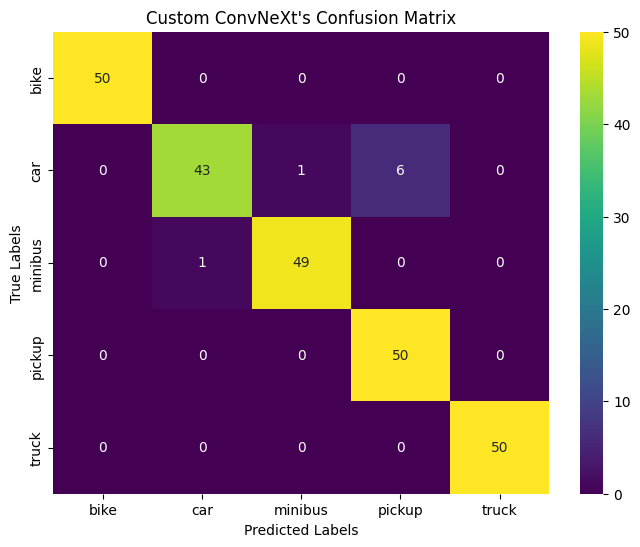

In [3]:
class_names = ['bike', 'car', 'minibus', 'pickup', 'truck']

# Visualize confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.viridis, xticklabels=class_names, yticklabels=class_names)
plt.title('Custom ConvNeXt\'s Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [4]:
# Display classification report
print("Custom ConvNeXt Classification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_names))

Custom ConvNeXt Classification Report:
              precision    recall  f1-score   support

        bike       1.00      1.00      1.00        50
         car       0.98      0.86      0.91        50
     minibus       0.98      0.98      0.98        50
      pickup       0.89      1.00      0.94        50
       truck       1.00      1.00      1.00        50

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [5]:
# Get a single image for inference
image, _ = test_generator.next()

# Measure inference time
start_time = time.time()
predictions = model.predict(image)
inference_time = time.time() - start_time

# Display the inference time
print(f'Custom ConvNeXt\'s Inference Time (for a single image) : {inference_time:.4f} seconds')


1/1 [==============================] - 5s 5s/step
Custom ConvNeXt's Inference Time (for a single image) : 4.8566 seconds


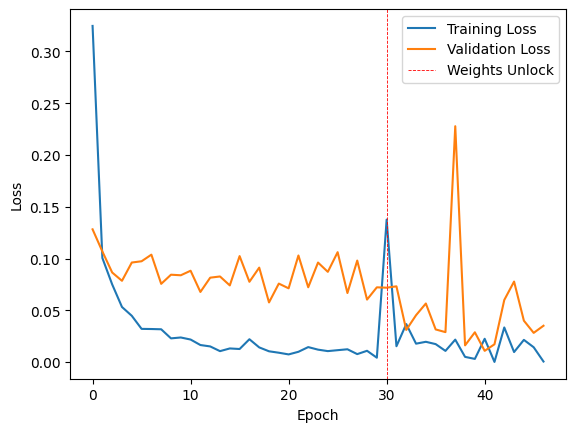

In [6]:

history_filename = '/content/drive/MyDrive/R&D Project/Histories/ConvNeXtBaseModel_training_history.pkl'

# Load the training history from the file
try:
    with open(history_filename, 'rb') as file:
        history = pickle.load(file)
except FileNotFoundError:
    print(f"No history file found: {history_filename}")
    history = {'loss': [], 'val_loss': []}

# Plot training loss and validation losses
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')

# Add a vertical line at the 30th epoch to indicate weights unlocking
epoch_unlocked = 30
plt.axvline(x=epoch_unlocked, color='r', linestyle='--',linewidth=0.6 , label='Weights Unlock')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
